https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need to show total amount of sales per year

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [24]:
%run jsoncleaner.py

In [25]:
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#df['Most Recent Sale Date'] = pd.to_datetime(df['Most Recent Sale Date'])

In [26]:
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
column = df.groupby('Neighborhood').mean()
column['Mean PPS'] = column['Sale Price'] / column['Square Footage Improved']
column['Mean PPS']=column['Mean PPS'].replace(np.inf, np.nan)
meansales = pd.DataFrame(column['Mean PPS'])
df=df.merge(meansales,how = 'left', on = 'Neighborhood')

In [27]:
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

In [97]:
start, end = '2015-01-01', '2019-06'
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()

In [40]:
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
idf = pd.DataFrame(df[['Sale Price', 'Sale Date', 'Zone']])
monthly = idf.resample('M').mean()
monthly.head(10)

,Sale Price,Zone
Most Recent Sale Date,,
1997-06-30,171900.0,2.0
1997-07-31,NaN,NaN
1997-08-31,NaN,NaN
1997-09-30,NaN,NaN
1997-10-31,NaN,NaN
1997-11-30,NaN,NaN
1997-12-31,NaN,NaN
1998-01-31,228000.0,8.0
1998-02-28,NaN,NaN


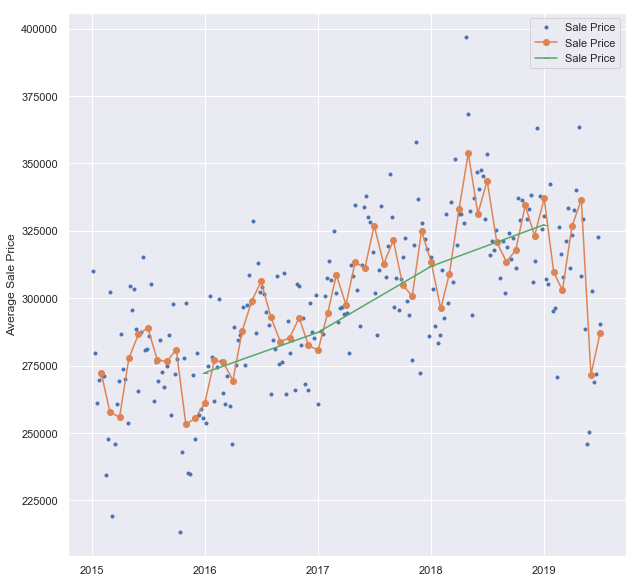

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[start:end],marker='.',linestyle='None')
ax.plot(monthlymean.loc[start:end], marker='o')
ax.plot(yearlymean.loc[start:end], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
#Notice the uptick during summer

In [67]:
#Want a stacked/area graph of sales by Zone and by Housing Type
sns.lmplot()

In [105]:
df['PPS'] = df['Sale Price'] / df['Square Footage Improved']
df['PPS'] = df['PPS'].replace(np.inf, np.nan)

In [106]:
monthlypps = df.PPS.resample('M').mean()

monthlypps.loc[start:end].head()

Most Recent Sale Date
2015-01-31    160.609451
2015-02-28    144.987879
2015-03-31    141.378106
2015-04-30    144.643852
2015-05-31    158.591463
Freq: M, Name: PPS, dtype: float64

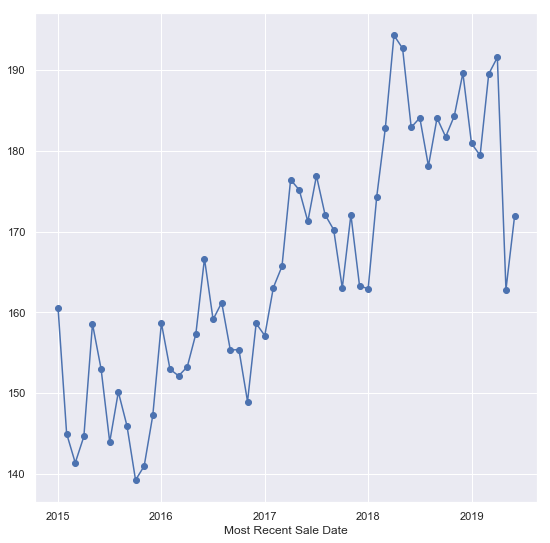

In [110]:
plt.figure(figsize=(9,9))
monthlypps.loc[start:end].plot(marker='o')